## DEFINE PROBLEM

In [1]:

####Airline_Data='https://github.com/fivethirtyeight/data/blob/master/airline-safety/airline-safety.csv'

'''airline,	avail_seat_km_per_week,	incidents_85_99,	fatal_accidents_85_99,	
fatalities_85_99	incidents_00_14	fatal_accidents_00_14	fatalities_00_14
'''
####Create a model that predicts if or not an airlines fatality rate is high or low
###To help travellers know which airline is best for their travels


'airline,\tavail_seat_km_per_week,\tincidents_85_99,\tfatal_accidents_85_99,\t\nfatalities_85_99\tincidents_00_14\tfatal_accidents_00_14\tfatalities_00_14\n'

**DATA DISCOVERY**

In [2]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as PH
%matplotlib inline

In [3]:
#import data
#import file to google colab
from google.colab import files
uploaded = files.upload()

Saving airline_data.xlsx to airline_data (2).xlsx


In [4]:
#load dataset
df=pd.read_excel('airline_data.xlsx')

In [5]:
#view first five data sets
df.head(5)

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


In [6]:
#view last five datasets
df.tail(5)

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
51,United / Continental*,7139291291,19,8,319,14,2,109
52,US Airways / America West*,2455687887,16,7,224,11,2,23
53,Vietnam Airlines,625084918,7,3,171,1,0,0
54,Virgin Atlantic,1005248585,1,0,0,0,0,0
55,Xiamen Airlines,430462962,9,1,82,2,0,0


In [7]:
#Data Description
df.describe()

,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
count,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,1.384621e+09,7.178571,2.178571,112.410714,4.125000,0.660714,55.517857
std,1.465317e+09,11.035656,2.861069,146.691114,4.544977,0.858684,111.332751
min,2.593733e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.740362e+08,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,8.029089e+08,4.000000,1.000000,48.500000,3.000000,0.000000,0.000000
75%,1.847239e+09,8.000000,3.000000,184.250000,5.250000,1.000000,83.250000
max,7.139291e+09,76.000000,14.000000,535.000000,24.000000,3.000000,537.000000


In [8]:
#find null values and take care of missing data(if any)
df.isnull().sum()

airline                   0
avail_seat_km_per_week    0
incidents_85_99           0
fatal_accidents_85_99     0
fatalities_85_99          0
incidents_00_14           0
fatal_accidents_00_14     0
fatalities_00_14          0
dtype: int64

In [9]:
#find duplicate and take care of duplicated data(if any)
df.duplicated().sum()

0

In [10]:
##Get the total_incidents, total_accidents, and total_falities which will be used for regression analysis model
df['total_incidents'] = df['incidents_85_99'] + df['incidents_00_14']
df['total_accidents'] = df['fatal_accidents_85_99'] + df['fatal_accidents_00_14']
df['total_fatalities'] = df['fatalities_85_99'] + df['fatalities_00_14']


In [11]:
##view the head the total_incidents, total_accidents, and total_falities which will be used for regression analysis model
df['total_incidents'].head()

0     2
1    82
2     7
3     8
4     4
Name: total_incidents, dtype: int64

In [12]:
#create a new dataframe
df=df[['airline','avail_seat_km_per_week','total_incidents','total_accidents','total_fatalities']]
df.head()

,airline,avail_seat_km_per_week,total_incidents,total_accidents,total_fatalities
0,Aer Lingus,320906734,2,0,0
1,Aeroflot*,1197672318,82,15,216
2,Aerolineas Argentinas,385803648,7,0,0
3,Aeromexico*,596871813,8,1,64
4,Air Canada,1865253802,4,0,0


**EDA**

In [13]:
#check the dimension of the dataset
df.shape

(56, 5)

In [14]:
###from the dimension showed above, we discover that n>p
###where:n=data points,p=features
###This allows the test observations perform well

In [15]:
df.describe()

,avail_seat_km_per_week,total_incidents,total_accidents,total_fatalities
count,5.600000e+01,56.000000,56.000000,56.000000
mean,1.384621e+09,11.303571,2.839286,167.928571
std,1.465317e+09,13.522936,3.372492,188.275703
min,2.593733e+08,0.000000,0.000000,0.000000
25%,4.740362e+08,4.000000,1.000000,2.750000
50%,8.029089e+08,8.000000,1.000000,88.500000
75%,1.847239e+09,12.250000,5.000000,283.750000
max,7.139291e+09,82.000000,15.000000,760.000000


In [16]:
#Check the datatype of the features in the dataframe
df.dtypes

airline                   object
avail_seat_km_per_week     int64
total_incidents            int64
total_accidents            int64
total_fatalities           int64
dtype: object

In [17]:
#find null values and take care of missing data(if any)
df.isnull().sum()

airline                   0
avail_seat_km_per_week    0
total_incidents           0
total_accidents           0
total_fatalities          0
dtype: int64

In [18]:
#set precision to 2 and display.width to 100
pd.set_option('display.width',100)
pd.set_option('precision',2)

In [19]:
#corr is used to show the corrolation between features
df.corr()

,avail_seat_km_per_week,total_incidents,total_accidents,total_fatalities
avail_seat_km_per_week,1.00,0.47,0.49,0.3
total_incidents,0.47,1.00,0.89,0.4
total_accidents,0.49,0.89,1.00,0.6
total_fatalities,0.30,0.40,0.60,1.0


In [20]:
##from the corrolation above,

**VISUALIZATION**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f276c9dbc18>,
      dtype=object)

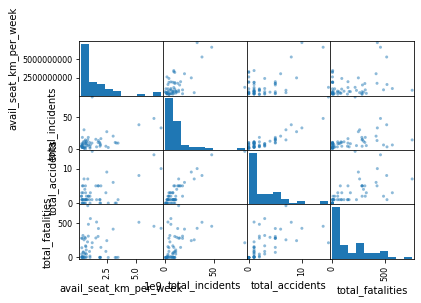

In [21]:
#Scatter plot
from pandas.plotting import scatter_matrix
scatter_matrix(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f276c4d6390>,
      dtype=object)

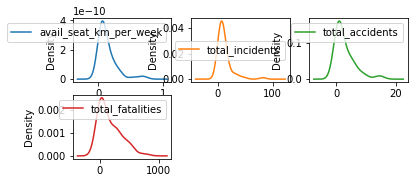

In [22]:
df.plot(kind='density',subplots=True,layout=(3,3),sharex=False,sharey=False)

In [23]:
##skew is used to check the skewness of the features in a dataset
df.skew()

avail_seat_km_per_week    2.34
total_incidents           3.27
total_accidents           1.86
total_fatalities          1.08
dtype: float64

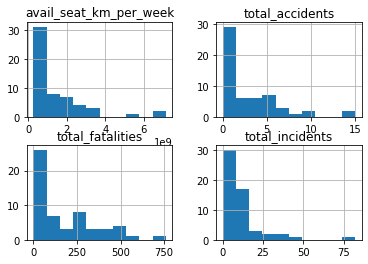

In [24]:
#Create a histplot to see understand the data is skew, Gaussian and exponential distribution and also see the possible outliers
df.hist()
PH.show()

In [25]:
###from the histplot above we discover that


avail_seat_km_per_week       AxesSubplot(0.125,0.125;0.168478x0.755)
total_incidents           AxesSubplot(0.327174,0.125;0.168478x0.755)
total_accidents           AxesSubplot(0.529348,0.125;0.168478x0.755)
total_fatalities          AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

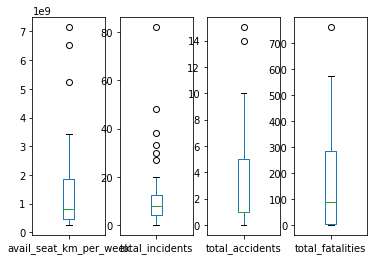

In [26]:
df.plot(kind='box',subplots=True,layout=(1,4),sharex=False,sharey=False)

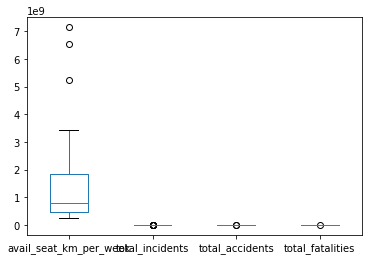

In [27]:
df.plot(kind='box',subplots=False,layout=(3,3),sharex=False,sharey=False)

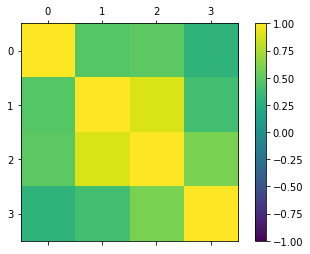

In [28]:
#Multivariance plot
corrolation=df.corr()
fig=PH.figure()
Ax=fig.add_subplot(111)
CAX=Ax.matshow(corrolation,vmin=-1,vmax=1)
fig.colorbar(CAX)
PH.show()

MODEL DEVELOPMENT

In [29]:
target=df['total_fatalities']
target.unique()

array([  0, 216,  64, 416, 487,   7,  88,  50,   1, 517, 323, 760,  16,
        47, 458, 296,   4, 259, 282, 143, 148, 520, 283,   3, 425,  21,
         2, 571, 280,  75,  51, 110, 313,  89, 159,  14, 229,   6, 286,
       309, 428, 247, 171,  82])

In [30]:
Airline_data=df.drop(['total_fatalities','airline'],axis=1)

In [31]:
#PREPOCESSED DATA
#import train_test-split
#Split the data into training sets
from sklearn.model_selection import train_test_split
#import LabelEncoder as it works fine with categorical variables
from sklearn.preprocessing import LabelEncoder
#Extract the independent and dependent variables as x and y
x,y=Airline_data.values,target.values
#initialize LabelEncoder
Label_Encoder=LabelEncoder()
#use fit_transform function to fit transformed target values
y=Label_Encoder.fit_transform(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [32]:
#import libraries needed for regression model and testing of accuracy of the model
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
#fit trained dataset into linear regression model
regress= linear_model.LinearRegression()
regress.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
# get the coefficients of the variables
print('Coefficients: \n', regress.coef_)

Coefficients: 
 [-5.52129921e-10 -9.39497402e-01  6.30079153e+00]


EVALUATION

In [35]:
#make predictions using the subset of the data(x_test)
y_predict=regress.predict(x_test)

In [36]:
print(y_predict)

[13.60675434  6.33321577 21.82309699 52.63490587 22.35258683  9.07613677
 35.94315873  8.71194223 34.29152687 16.24529666 12.78087071 17.35929716
 24.34583893 26.95476199  9.01192835 11.57797285 31.13505277]


In [37]:
#Evaluate the accuracy of the model
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test,y_predict))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test,y_predict))

Mean squared error: 122.02
Coefficient of determination: 0.02


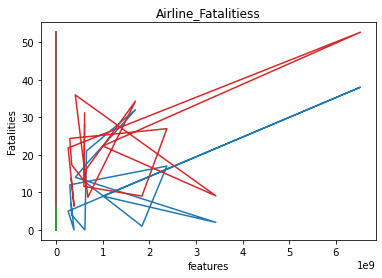

In [47]:
#PH.scatter(x_test,y_test,color='black')
PH.plot(x_test, y_test)
PH.plot(x_test,y_predict)
PH.title('Airline_Fatalitiess')
PH.xlabel('features')
PH.ylabel('Fatalities')

PH.show()



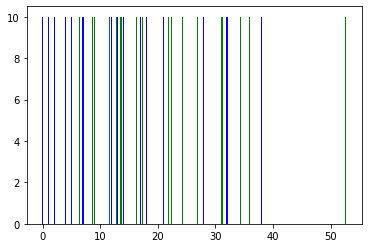

In [58]:
AV = PH.subplot(111)
AV.bar(y_test, 10, width=0.2, color='b', align='center')
AV.bar(y_predict, 10, width=0.2, color='g', align='center')
#ax.xaxis_date()
PH.show()